In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()

<Figure size 1000x600 with 0 Axes>

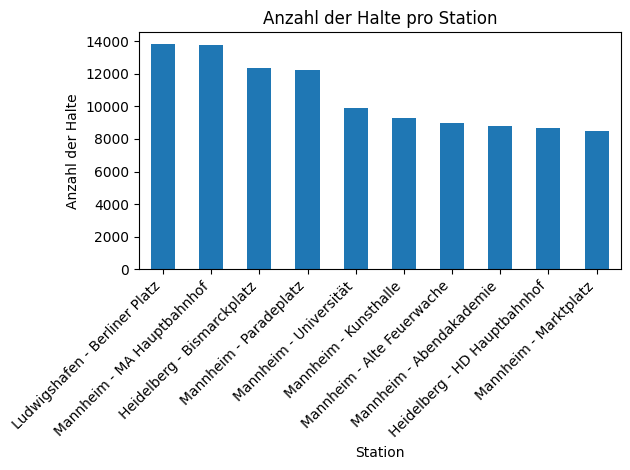

In [10]:
cursor.execute("SELECT api_station, stations.api_name, stations.api_place, COUNT(*) AS number_stops FROM stops JOIN stations ON api_station = stations.api_hafasID GROUP BY api_station ORDER BY number_stops DESC LIMIT 10;")
topStationStops = cursor.fetchall()


# Ergebnisse in einen DataFrame umwandeln
df = pd.DataFrame(topStationStops, columns=['station_id', 'station_name', 'station_place', 'number_stops'])

# Ort und Name kombinieren
df['place_name'] = df['station_place'] + ' - ' + df['station_name']

# Diagramm erstellen
plt.figure(figsize=(10, 6))
ax = df.plot(kind="bar", x='place_name', y='number_stops', rot=45, align='center', legend=False)
plt.xlabel('Station')
plt.ylabel('Anzahl der Halte')
plt.title('Anzahl der Halte pro Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

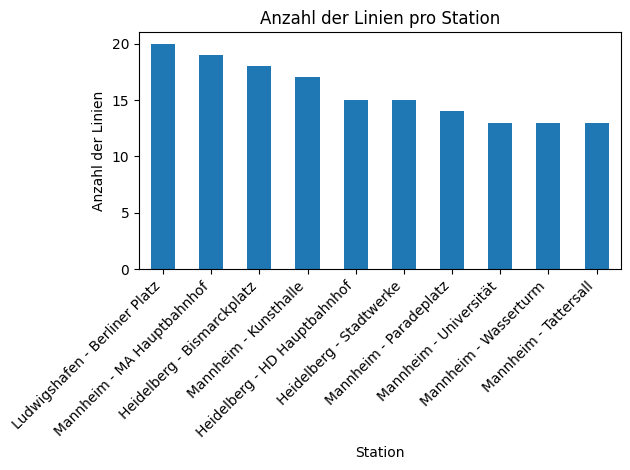

In [13]:
cursor.execute("SELECT api_station, stations.api_name, stations.api_place, COUNT(DISTINCT `lines`.linegroup) AS number_lines FROM stops JOIN stations ON api_station = stations.api_hafasID JOIN `lines` ON api_line = `lines`.id GROUP BY api_station ORDER BY number_lines DESC LIMIT 10;")
topStationStops = cursor.fetchall()


# Ergebnisse in einen DataFrame umwandeln
df = pd.DataFrame(topStationStops, columns=['station_id', 'station_name', 'station_place', 'number_lines'])

# Ort und Name kombinieren
df['place_name'] = df['station_place'] + ' - ' + df['station_name']

# Diagramm erstellen
plt.figure(figsize=(10, 6))
ax = df.plot(kind="bar", x='place_name', y='number_lines', rot=45, align='center', legend=False)
plt.xlabel('Station')
plt.ylabel('Anzahl der Linien')
plt.title('Anzahl der Linien pro Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()